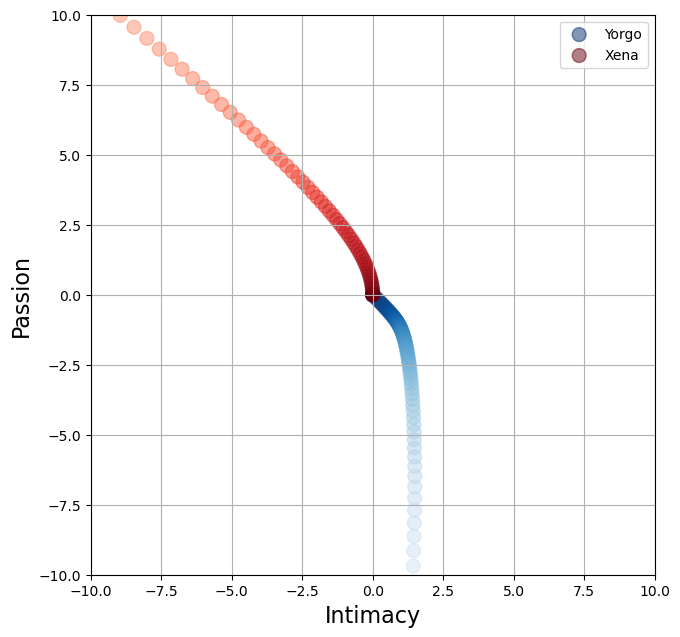

In [32]:
import networkx as nx
import random
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pickle
random.seed(0)
num = 0


def calculateODE(axx,axy,bxx,bxy,cxx,cxy,dxx,dxy,fxy,gxy,ayy,ayx,byy,byx,cyy,cyx,dyy,dyx,fyx,gyx,xi0,yi0,xp0,yp0): 
    A = np.array([[axx, axy, bxx, bxy], [ayx, ayy, byx, byy], [cxx, cxy, dxx, dxy], [cyx, cyy, dyx, dyy]])
    B = np.array([fxy, fyx, gxy, gyx])
    vdp1 = lambda T, x: A.dot(np.array([x[0], x[1], x[2], x[3]])) + B
    sol = solve_ivp (vdp1, [0, 8], np.array([xi0, yi0, xp0, yp0]), max_step=0.1)
    return sol

def calculateODEMatrixVector(A, B, x): 
    vdp1 = lambda T, x: A.dot(np.array([x[0], x[1], x[2], x[3]])) + B
    sol = solve_ivp (vdp1, [0, 8], np.array([x[0], x[1], x[2], x[3]]), max_step=0.1)
    return sol


def update_plot(axx,axy,bxx,bxy,cxx,cxy,dxx,dxy,fxy,gxy,ayy,ayx,byy,byx,cyy,cyx,dyy,dyx,fyx,gyx,xi0,yi0,xp0,yp0):
    sol = calculateODE(axx,axy,bxx,bxy,cxx,cxy,dxx,dxy,fxy,gxy,ayy,ayx,byy,byx,cyy,cyx,dyy,dyx,fyx,gyx,xi0,yi0,xp0,yp0)
    [t, xa] = [sol.t, sol.y]

    fig = plt.figure(figsize=(16, 16))

    ax = fig.add_subplot(2, 2, 2)
    ax.scatter(xa[0], xa[2], s=100, cmap='Blues_r', alpha=0.5, label="Yorgo", c=t)
    ax.scatter(xa[1], xa[3], s=100, cmap='Reds_r', alpha=0.5, label="Xena", c=t)
    ax.set_xlabel('Intimacy', fontsize=16)
    ax.set_ylabel('Passion', fontsize=16)
    
    ax.set_xlim(-10.0, 10.0)
    ax.set_ylim(-10.0, 10.0)

    ax.grid(True)
    ax.legend()

    plt.show()

# Parameters
axx = -0.2  # Forgetting coefficient of the intimacy of Xena to Yorgo.
axy = -0.4  # If Yorgo’s intimacy increases, Xena’s will decrease, and if it decreases, it will increase.
bxx = +0.5  # If Xena’s passion increases, her sense of intimacy increases, and if it decreases, it decreases.
bxy = -0.2  # As Yorgo’s passion for Xena increase, Xena’s closeness to Yorgo decreases.
cxx = +0.3  # Her passion increase when Xena feels close. Men with whom she does not feel close are not attractive.
cxy = +0.7  # Intimate men are very attractive to Xena. Her passion for men who do not behave closely is significantly reduced.
dxx = -0.1  # Forgetting coefficient of the passion of Xena for Yorgo.
dxy = +0.4  # As Yorgo’s passion grows, so does Xena’s. A man who acts romantic may attract her.
fxy = +1.0  # Xena’s impression of intimacy or friendship with Yorgo. She finds Yorgo intimate and friendly.
gxy = -1.0  # Xena’s impression of glamourousness or attractiveness about Yorgo. She does not find Yorgo romantically or sexually attractive.
ayy = -0.2  # Forgetting coefficient of the intimacy of Yorgo to Xena.
ayx = +0.6  # If Yorgo’s intimacy increases, Xena’s will decrease, if it decreases, it will increase.
byy = -0.5  # If Yorgo’s passion increases, his sense of intimacy decreases, and if it decreases, it increases.
byx = +0.6  # As Xena’s passion for Yorgo increases, Yorgo’s intimacy with Xena increases.
cyy = -0.3  # His passion decreases when Yorgo feels close. Women with whom he does not feel close are attractive.
cyx = -0.1  # Intimate women are not attractive to Yorgo. His passion for women who are close to him weakens a little.
dyy = -0.1  # Forgetting coefficient of the passion of Yorgo to Xena.
dyx = -0.4  # As Xena’s passion increases, Yorgo’s decreases.
fyx = +0.0  # Yorgo’s impression of intimacy or friendship with Xena. Yorgo found Xena neither sympathetic nor antipathetic.
gyx = +1.0  # Yorgo’s impression of glamourousness or attractiveness about Xena. He finds Xena attractive and desires her romantically and sexually.
xi0 = 0.0   # Initial value for Xena's intimacy.
yi0 = 0.0   # Initial value for Yorgo's intimacy.
xp0 = 0.0   # Initial value for Xena's passion.
yp0 = 0.0   # Initial value for Yorgo's passion.



update_plot(axx, axy, bxx, bxy, cxx, cxy, dxx, dxy, fxy, gxy, ayy, ayx, byy, byx, cyy, cyx, dyy, dyx, fyx, gyx, xi0, yi0, xp0, yp0)

